# 1 loading the library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# 2. Let we load the data

In [2]:
df=pd.read_csv(r"C:\Users\JEEVAN\Documents\vinod sir notes\Machine Learning\2. Logistic Regression\datasets\cs2m\cs2m.csv")
df.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
0,100,150,20,0,0,0
1,120,160,16,0,0,0
2,110,150,18,0,0,0
3,100,175,25,0,0,0
4,95,250,36,0,0,0


In [3]:
df.shape

(30, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   BP       30 non-null     int64
 1   Chlstrl  30 non-null     int64
 2   Age      30 non-null     int64
 3   Prgnt    30 non-null     int64
 4   AnxtyLH  30 non-null     int64
 5   DrugR    30 non-null     int64
dtypes: int64(6)
memory usage: 1.5 KB


In [5]:
df.isnull().sum()

BP         0
Chlstrl    0
Age        0
Prgnt      0
AnxtyLH    0
DrugR      0
dtype: int64

# Target variable DrugR

In [7]:
df.DrugR.value_counts()

0    15
1    15
Name: DrugR, dtype: int64

Text(0.5, 1.0, 'countplot of DrugR')

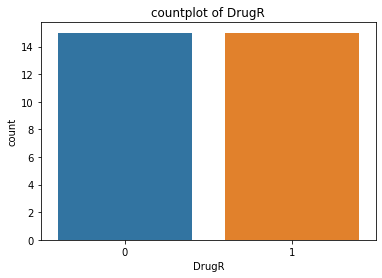

In [10]:
sns.countplot(df.DrugR)
plt.title('countplot of DrugR')

In [11]:
df.columns

Index(['BP', 'Chlstrl', 'Age', 'Prgnt', 'AnxtyLH', 'DrugR'], dtype='object')

# Feature no. 1
# BP

In [12]:
df.BP.value_counts()

120    6
100    4
125    3
110    2
95     2
150    2
145    2
130    2
160    1
135    1
165    1
115    1
170    1
180    1
140    1
Name: BP, dtype: int64

Text(0.5, 1.0, 'distribution of BP')

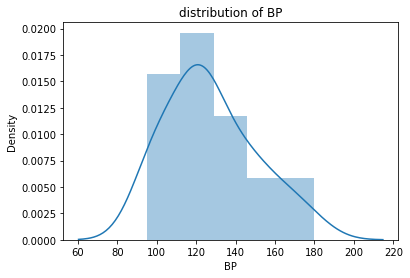

In [14]:
sns.distplot(df.BP)
plt.title('distribution of BP')

Text(0.5, 1.0, 'Countplot of BP')

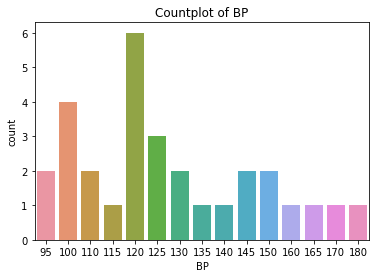

In [16]:
sns.countplot(df.BP)
plt.title('Countplot of BP')

Text(0.5, 1.0, 'Boxplot of BP')

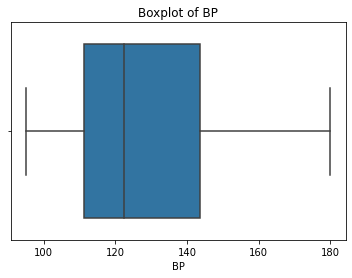

In [18]:
sns.boxplot(df.BP)
plt.title('Boxplot of BP')

In [28]:
from scipy.stats import ttest_ind

a=df[df.DrugR==0]
b=df[df.DrugR==1]

In [29]:
ttest_ind(a.BP,b.BP)

Ttest_indResult(statistic=-0.8755089017845972, pvalue=0.388745989399778)

<AxesSubplot:xlabel='BP', ylabel='count'>

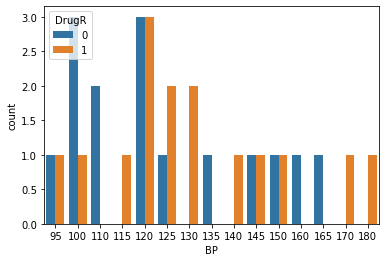

In [31]:
sns.countplot('BP',hue='DrugR',data=df)

In [32]:
# Will do all the test lateron1

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# will build Generalized Linear Models (GLM)

In [34]:
df.columns

Index(['BP', 'Chlstrl', 'Age', 'Prgnt', 'AnxtyLH', 'DrugR'], dtype='object')

In [38]:
model=smf.glm('DrugR~ BP+Chlstrl+Age+Prgnt+AnxtyLH',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  DrugR   No. Observations:                   30
Model:                            GLM   Df Residuals:                       24
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                         0.17559
Method:                          IRLS   Log-Likelihood:                -13.127
Date:                Mon, 31 Jan 2022   Deviance:                       4.2141
Time:                        23:31:27   Pearson chi2:                     4.21
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2947      0.690     -0.427      0.669      -1.646       1.057
BP            -0.0035      0.004     -0.850      0.395      -0.011       0.005
Chlstrl        0.0010      0.003      0.314      0.753      -0.005       0.007
Age            0.0172      0.009      1.916      0.055      -0.000       0.035
Prgnt          0.6090      0.187      3.262      0.001       0.243       0.975
AnxtyLH        0.2151      0.289      0.743      0.457      -0.352       0.782
==============================================================================
"""

In [39]:
predictions=model.predict()

In [40]:
predictions_nominal=[0 if x<0.5 else 1 for x in predictions]

In [41]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
print(confusion_matrix(df.DrugR,predictions_nominal))

[[11  4]
 [ 2 13]]


In [44]:
print(classification_report (df.DrugR,predictions_nominal))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.76      0.87      0.81        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30



## Roc Curve

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score

In [46]:
x=df.loc[:,df.columns!='DrugR']
y=df.loc[:,df.columns=='DrugR']

In [47]:
clf_reg=LogisticRegression()
clf_reg.fit(x,y)

LogisticRegression()

In [48]:
y_score=clf_reg.predict_proba(x)[:,1]

In [50]:
fpr,tpr,threshold=roc_curve(y,y_score)

In [52]:
print('roc_auc_score for logistic Regression= ',roc_auc_score(y,y_score))

roc_auc_score for logistic Regression=  0.88


In [60]:
from sklearn.metrics import auc
auc=auc(fpr,tpr)

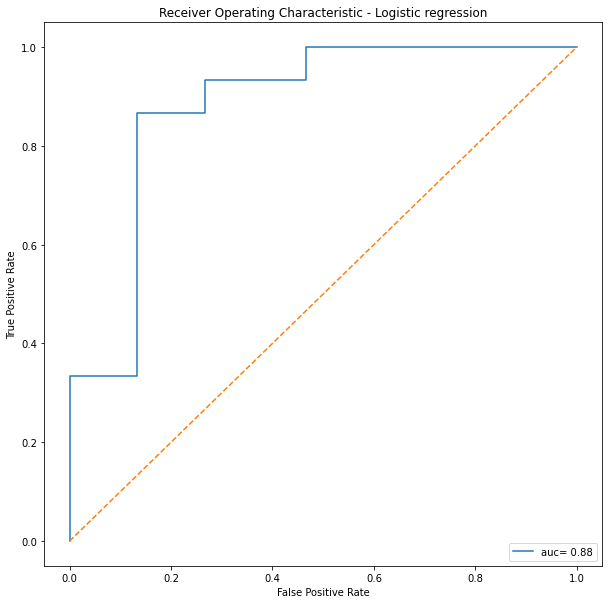

In [69]:
plt.subplots(1,figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(fpr,tpr,label='auc= {}'.format(auc))
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()